<a href="https://colab.research.google.com/github/Archi2903/AI-in-Engenery/blob/main/HW_03_Mini_Project_(MS_classification)_mlp_version_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENR4320] Energy Resources and AI 22251844 이도윤

##HW #03 - Mini-Project (MS classification)

Data 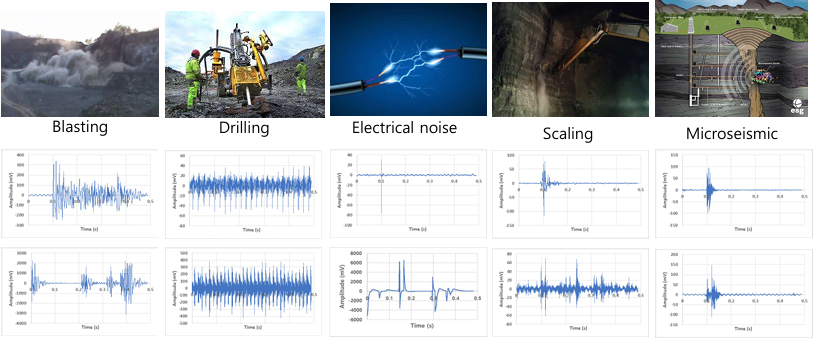

Attributes:
-  Duration
-  Rising time
-  Maximum amplitude
-  Relative amplitude
-  Pseudo energy
-  Pseudo frequency




In [42]:
# Ok, Now version try to use multi-layer perceptron(MLP) on Keras for classification Micro-  Seismic signal

# 1 Section Import library and data

import pandas as pd # for table data csv
from sklearn.model_selection import train_test_split            # for split
from sklearn.preprocessing import StandardScaler, LabelEncoder  #

df = pd.read_csv("danyang_ms_train.csv") # import and read table dataset

print(df.head(), "\n") # check dataset

print(df['Label'].value_counts(), "\n") #check label

"We did import csv dataset,read and check-result see data table set and label(5) scaling, drilling,blasting, electric noise, microseismic"

   Duration  Rising_time  Absolute_amplitude  Relative_amplitude  \
0  0.488282     0.048906           87.319443            0.019629   
1  0.443321     0.081856           54.576271            0.076005   
2  0.016250     0.005723           57.395706            0.543220   
3  0.050586     0.004277           64.888947            0.283787   
4  0.285449     0.169414          169.013840            0.033295   

   Pseudo_energy   Psudo_freq         Label  
0       0.099501   540.671692      drilling  
1       0.025697   279.707306       scaling  
2       0.003595  2153.844971  microseismic  
3       0.006882   355.829926  microseismic  
4       0.058662   126.116928      blasting   

Label
scaling           843
drilling          825
blasting          713
electric noise    645
microseismic      349
Name: count, dtype: int64 



'We did import csv dataset,read and check-result see data table set and label(5) scaling, drilling,blasting, electric noise, microseismic'

In [43]:
# Section 2 preparation Label

X = df.drop('Label', axis=1).values
y = df['Label'].values

le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_
print("Class after recode LabelEncoder:", class_names, "\n")

Class after recode LabelEncoder: ['blasting' 'drilling' 'electric noise' 'microseismic' 'scaling'] 



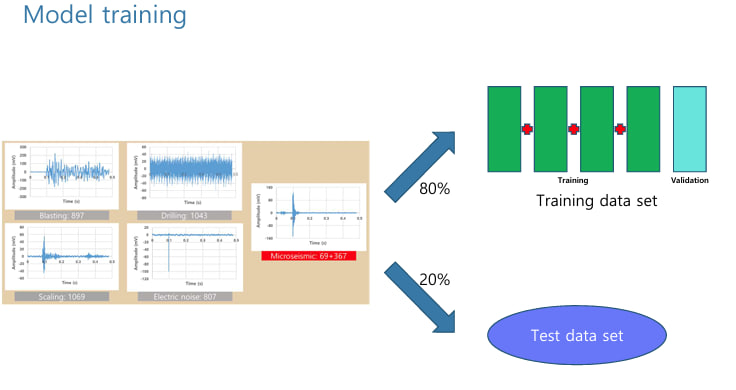

In [44]:
# Section 3 Split dataset on training and test data set

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.20, stratify=y_enc, random_state=42)

print(f"Sample size: Training {X_train.shape}, Test {X_test.shape}\n")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("Scaled:\n", X_train_scaled[:3], "\n")

"""We are use function train_test_split(*arrays, test_size=None,
train_size=None, random_state=None, shuffle=True, stratify=None)
for split data 20/80% and scaling for MLP
and Result: Sample size: Training (2700, 6), Test (675, 6)"""


Sample size: Training (2700, 6), Test (675, 6)

Scaled:
 [[ 1.02644174  1.7196647  -0.16387048 -0.28665982  0.44713466 -0.33270216]
 [ 1.04806168 -0.8068661  -0.2252577  -0.286889    0.51606289 -0.4029347 ]
 [ 1.06568553 -0.32961683 -0.43104817 -0.28887252  1.52510212 -0.09134998]] 



'We are use function train_test_split(*arrays, test_size=None, \ntrain_size=None, random_state=None, shuffle=True, stratify=None) \nfor split data 20/80% and scaling for MLP\nand Result: Sample size: Training (2700, 6), Test (675, 6)'

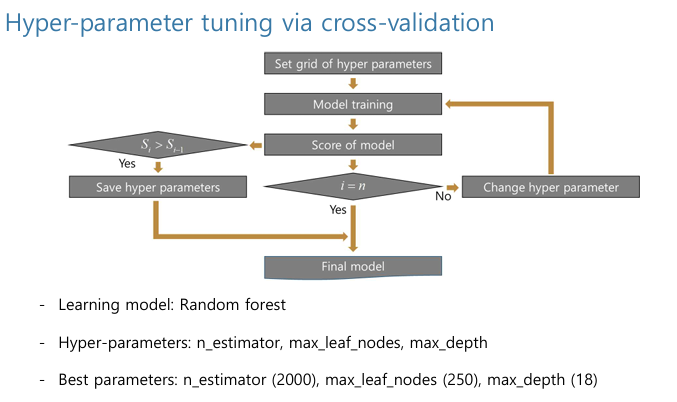

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 2,693 (10.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5076 - loss: 1.3034
Epoch 2/50
76/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7357 - loss: 0.8131

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7375 - loss: 0.8071
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.6296
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.5393
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8470 - loss: 0.4887
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8459 - loss: 0.4659
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.4118
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.4037
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4084
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3891
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3642
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8804 - loss: 0.3561
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8741 - loss: 0.3770

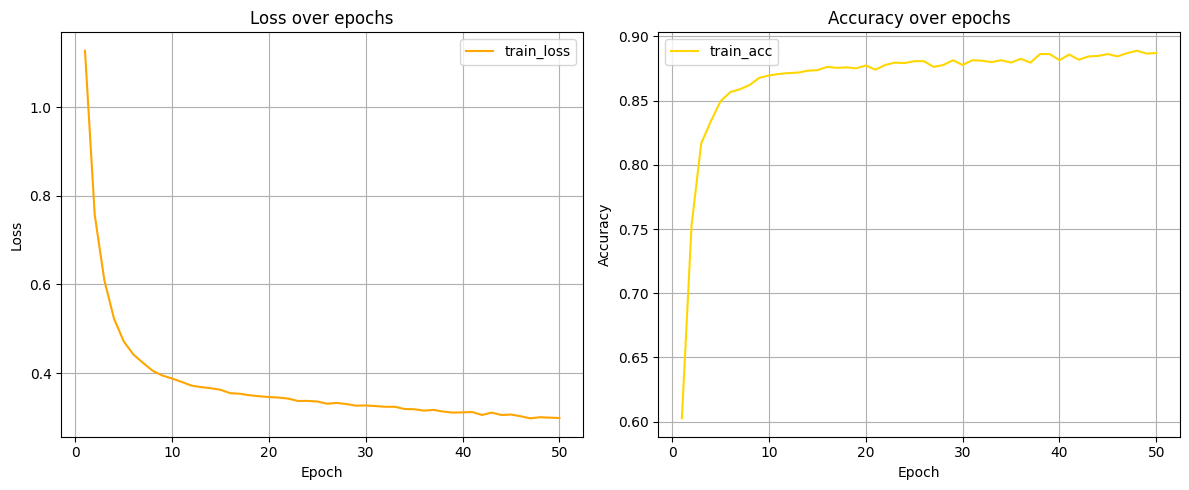

"1 Dense: dense (Dense)(64, activation='relu') input_shape=(6,) \n2 Dense: dense_1 (Dense)(32, activation='relu')\nOutput layer: dense_2 (Dense)(5, activation='softmax')  ]\nResult Total params: 2,693 (10.52 KB)\n Trainable params: 2,693 (10.52 KB)\n Non-trainable params: 0 (0.00 B)\n And graphic show more training(epoch) more better Accuracy and reduce Loss \n Our model successful trained !!!"

In [45]:
# Section 4 Architecture MLP model (tensorflow)

# input 5 neurons(blasting,drilling,electric noise,microseismic,scaling)
# 2 Dense(64 and 32) , activation function - ReLU
# Function Loss (sparse_categorical_crossentropy) !sorry i'm not expert in Python helped ChatGTP

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')  # output layer
])

# Check structure model
model.summary()

# Compilite model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  Training model
# Use EarlyStopping for control,if val_loss not good after 5 patirnce
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=32,
                    callbacks=[early_stop])
# Plot graphic
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], label='train_loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], label='train_acc', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
"""1 Dense: dense (Dense)(64, activation='relu') input_shape=(6,)
2 Dense: dense_1 (Dense)(32, activation='relu')
Output layer: dense_2 (Dense)(5, activation='softmax')  ]
Result Total params: 2,693 (10.52 KB)
 Trainable params: 2,693 (10.52 KB)
 Non-trainable params: 0 (0.00 B)
 And graphic show more training(epoch) more better Accuracy and reduce Loss
 Our model successful trained !!!"""

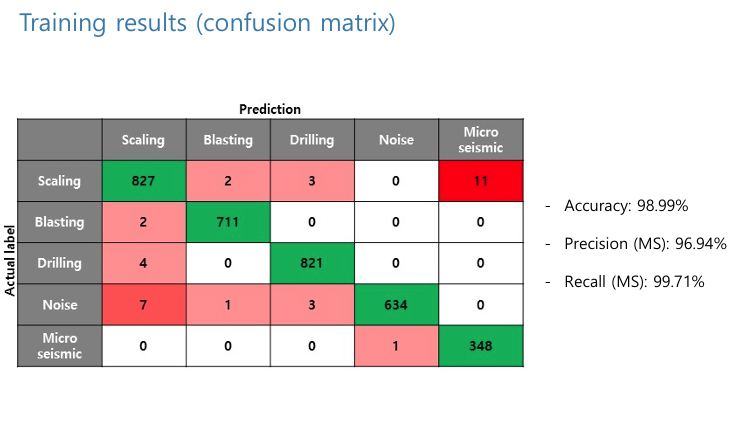

(Accuracy) test data: 0.881
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report (MLP):
                precision    recall  f1-score   support

      blasting       0.94      0.94      0.94       143
      drilling       0.99      0.91      0.95       165
electric noise       0.88      0.76      0.82       129
  microseismic       0.86      0.89      0.87        70
       scaling       0.77      0.89      0.82       168

      accuracy                           0.88       675
     macro avg       0.89      0.88      0.88       675
  weighted avg       0.89      0.88      0.88       675

Confusion Matrix (MLP):
[[135   0   6   0   2]
 [  1 150   0   0  14]
 [  6   0  98   2  23]
 [  0   0   1  62   7]
 [  2   2   6   8 150]]


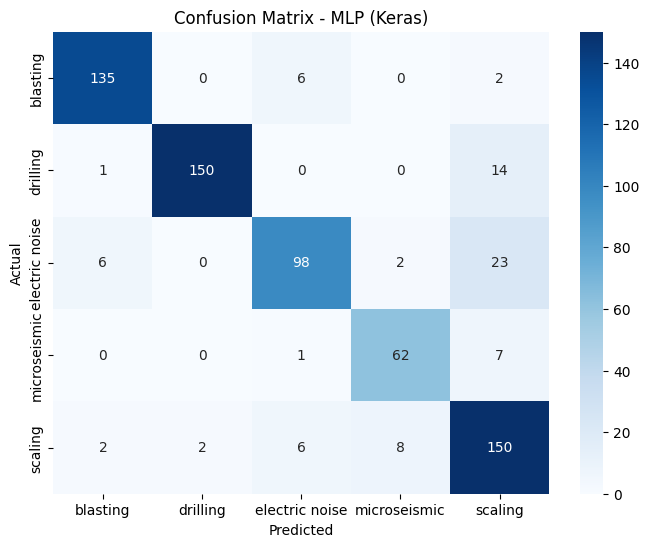

In [46]:
# Sectiom 5
# Estimate model
import seaborn as sns

from sklearn.metrics import confusion_matrix

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"(Accuracy) test data: {test_accuracy:.3f}")

# predict
y_pred_prob = model.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=1)

# Plot matrix report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (MLP):")
print(classification_report(y_test, y_pred, target_names=class_names, digits=2))

# confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (MLP):")
print(cm_mlp)

# plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix - MLP (Keras)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
"""
정확도(Accuracy)는 88.1%, 정밀도(Precision)는 89%, 재현율(Recall)은 88% We can say good model
"""

In [47]:

!pip install scikeras



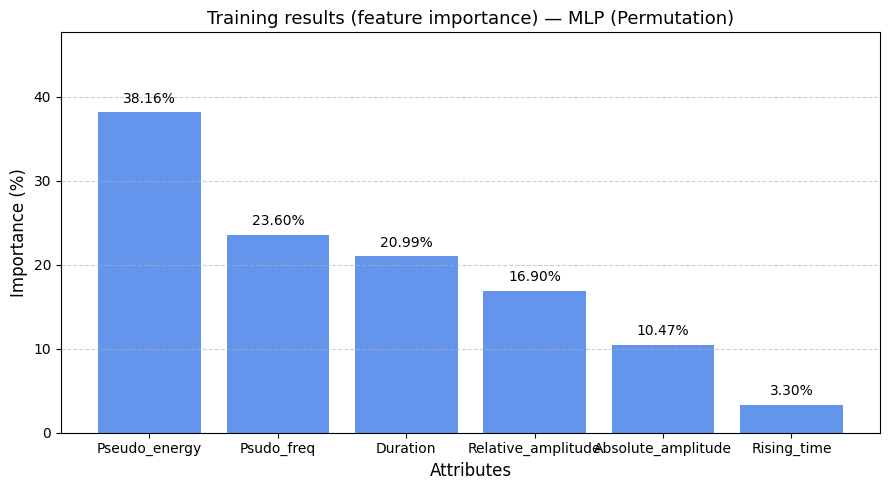

In [49]:
import numpy as np

from sklearn.metrics import accuracy_score
try:
    feature_columns
except NameError:
    if 'df' in globals() and 'Label' in df.columns:
        feature_columns = [c for c in df.columns if c != 'Label']
    else:
        # fallback
        feature_columns = [
            'Duration', 'Rising_time', 'Absolute_amplitude',
            'Relative_amplitude', 'Pseudo_energy', 'Psudo_freq'
        ]

y_pred_prob = model.predict(X_test_scaled, verbose=0)
y_pred = y_pred_prob.argmax(axis=1)
baseline_acc = accuracy_score(y_test, y_pred)


rng = np.random.default_rng(42)
repeats = 10
importances = []

for j in range(X_test_scaled.shape[1]):
    drops = []
    for _ in range(repeats):
        Xp = X_test_scaled.copy()
        idx = rng.permutation(Xp.shape[0])
        Xp[:, j] = Xp[idx, j]
        yp = model.predict(Xp, verbose=0).argmax(axis=1)
        acc = accuracy_score(y_test, yp)
        drops.append(max(0.0, baseline_acc - acc))
    importances.append(float(np.mean(drops)))

importances = np.array(importances) * 100.0

# plot
order = np.argsort(importances)[::-1]
feat_sorted = [feature_columns[i] for i in order]
imps_sorted = importances[order]

plt.figure(figsize=(9, 5))
bars = plt.bar(feat_sorted, imps_sorted, color='cornflowerblue')
plt.title("Training results (feature importance) — MLP (Permutation)", fontsize=13)
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Importance (%)", fontsize=12)
plt.ylim(0, max(imps_sorted)*1.25 if imps_sorted.size else 1)

for b, v in zip(bars, imps_sorted):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+max(0.5, 0.02*max(imps_sorted)),
             f"{v:.2f}%", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

"More importamce: Pseudo_energy, Psudo_freq, Duration but!!!! i think model not correct, still many operations and diffrent, need more time and test"

데이터를 활용하여 multi-layer perceptron(MLP) 모델을 학습시키는 과제가 주어졌다. 모델 학습 후 테스트 결과, 정확도(Accuracy)는 88.1%, 정밀도(Precision)는 89%, 재현율(Recall)은 88%로 나타나 모델의 신뢰도가 높음을 확인할 수 있었다. 다만, 데이터의 양을 늘릴 경우 성능 지표가 더욱 향상될 것으로 예상된다.

이후 미소지진 신호(classification of microseismic signals)를 분류하기 위해 Duration, Rising_time, Absolute_amplitude, Relative_amplitude, Pseudo_energy, Psudo_freq 등의 지표가 계산되었다. 그 결과, 가장 중요한 특징 변수는  Pseudo_energy (38.16%), Psudo_freq (23.6%)로 나타났다. 감사합니다